In [1]:
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('C:\\Users\\hp\\Desktop\\A1_2020A&PS0155H_2020A7PS1700H_2020A7PS0189H\\fods_1.csv')
data.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


In [3]:
def get_powers(degree):
    l=[0,1]
    powers=[]
    for i in range(1,degree+1):
        powers.append([x for x in combinations_with_replacement(l,i)])
    powers_flattened=[]
    for sublist in powers:
        for x in sublist:
            powers_flattened.append(x)
    return powers_flattened

In [4]:
def transform_data(X,powers):
    X_new=np.ones((X.shape[0],len(powers)))
    for n in range(X.shape[0]):
        for i in range(len(powers)):
            for j in powers[i]:
                X_new[n][i]=X_new[n][i]*X[n][j]
    return X_new

We have initially normalized the whole data which is a part of data pre-processing

In [5]:
data=(data-data.min())/(data.max()-data.min())

Separating the dataset into features and target variable

In [6]:
X=data.iloc[:,0:2]
X=X.values
#X[0].max()
X[1].max()

0.5825317429780685

In [7]:
y=data.iloc[:,2:3]
y=y.values 
y.max()

1.0

Generating all the combinations of the coefficients for all the degrees

In [8]:
powers_0=get_powers(0)
powers_1=get_powers(1)
powers_2=get_powers(2)
powers_3=get_powers(3)
powers_4=get_powers(4)
powers_5=get_powers(5)
powers_6=get_powers(6)
powers_7=get_powers(7)
powers_8=get_powers(8)
powers_9=get_powers(9)

Transforming the data as per the generated powers

In [9]:
X_0=transform_data(X,powers_0)
X_1=transform_data(X,powers_1)
X_2=transform_data(X,powers_2)
X_3=transform_data(X,powers_3)
X_4=transform_data(X,powers_4)
X_5=transform_data(X,powers_5)
X_6=transform_data(X,powers_6)
X_7=transform_data(X,powers_7)
X_8=transform_data(X,powers_8)
X_9=transform_data(X,powers_9)

Standardization of individual power combinations

In [10]:
y=(y-y.mean())/y.std()
X_1=(X_1-X_1.mean())/X_1.std()
X_2=(X_2-X_2.mean())/X_2.std()
X_3=(X_3-X_3.mean())/X_3.std()
X_4=(X_4-X_4.mean())/X_4.std()
X_5=(X_5-X_5.mean())/X_5.std()
X_6=(X_6-X_6.mean())/X_6.std()
X_7=(X_7-X_7.mean())/X_7.std()
X_8=(X_8-X_8.mean())/X_8.std()
X_9=(X_9-X_9.mean())/X_9.std()


In [11]:
# This function simply adds a column with all 1's at the beginning of X
def concatenate_ones(X):
    ones=np.ones((X.shape[0],1))
    X=np.concatenate((ones,X),axis=1) 
    return X

# This function calculates the predicted value of the target variable with provided weights.
def predicted(X,theta):
    return (X@(np.transpose(theta)))
# @ symbol is used for matrix multiplication 

# This function is used for calculating the cost at every iteration.
def cost(X,y,theta):
     return ((1/2)*np.sum(np.square((predicted(X,theta))-y)))
    
# This function is used for calculating the final squared error.
def squared_error(X,y,final_weights):
    return (1/(2*len(y)))*np.sum(np.square(predicted(X,final_weights)-y))


# This function is used to calculate the gradient descent.
def gradient_descent(X,y,theta,learning_rate,iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        theta = theta - (learning_rate/len(X)) * np.sum(X * ((predicted(X,theta)) - y), axis=0)
        cost_history[i] = cost(X, y, theta)   
    return theta,cost_history


# This function is used to generate the model for all the degrees and whenever the function will be called, the training
# testing error will be splitted and based on it the calculation will be calculated.
def make_model(X,y,learning_rate,iterations,degree):
    print("fitting polynomial of degree: "+str(degree))   
    X=concatenate_ones(X)
    theta=np.zeros((1,X.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49, shuffle=True)
    
    final_weights,cost_history = gradient_descent(X_train,y_train,theta,learning_rate,iterations)
    squared_error_test=squared_error(X_test,y_test,final_weights)
    squared_train_error=squared_error(X_train,y_train,final_weights)
    print("Weights: "+str(final_weights))
    print("squared_error for training dataset: "+str(squared_train_error))
    print("squared_error for testing dataset: "+str(squared_error_test))
    
    temp=np.arange(iterations)
    plt.plot(temp,cost_history,label='training error')
    plt.xlabel("Iterations")
    plt.ylabel("Training Error")
    plt.title(("Training Error for regression model of degree "+str(degree)))
    plt.legend( loc='upper left')
    
    return squared_error_test,squared_train_error

In [12]:
squared_error_list=[]
squared_train_error=[]

fitting polynomial of degree: 0
Weights: [[0.03675942]]
squared_error for training dataset: 0.5174846060607371
squared_error for testing dataset: 0.43405094826484564


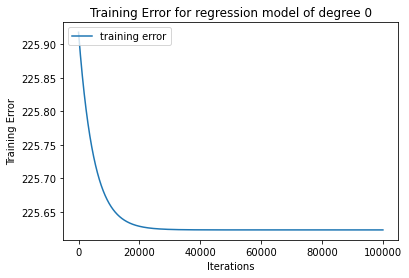

In [13]:
m=make_model(X_0,y,0.0001,100000,0)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 1
Weights: [[-0.19149277  0.71707054  0.3858571 ]]
squared_error for training dataset: 0.34561239074600414
squared_error for testing dataset: 0.28644294217554134


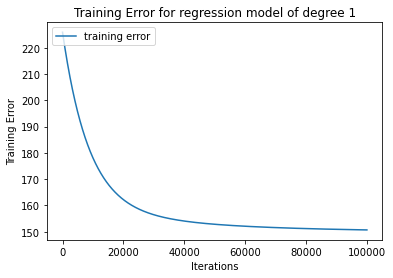

In [14]:
m=make_model(X_1,y,0.0001,100000,1)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 2
Weights: [[-0.17072504  0.20367639  0.18241975  0.48525956  0.30541848 -0.0297232 ]]
squared_error for training dataset: 0.3410940479794503
squared_error for testing dataset: 0.29959921457066857


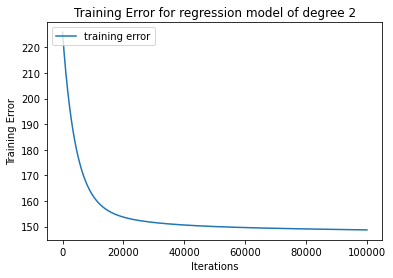

In [15]:
m=make_model(X_2,y,0.0001,100000,2)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 3
Weights: [[-0.16166181  0.02827128  0.17407557  0.26797278  0.21240216 -0.06118896
   0.32962772  0.21435719  0.05324937 -0.10594588]]
squared_error for training dataset: 0.3386945689449989
squared_error for testing dataset: 0.32179770658375184


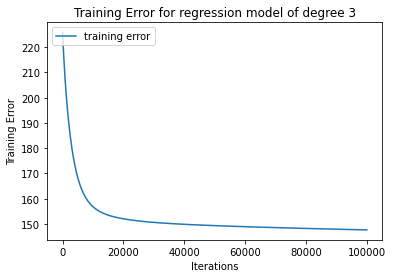

In [16]:
m=make_model(X_3,y,0.0001,100000,3)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 4
Weights: [[-0.16620978 -0.05524495  0.18566367  0.17639976  0.18286366 -0.0664051
   0.23068142  0.1590252   0.02343083 -0.11584709  0.22640969  0.14195286
   0.06104191 -0.00452777 -0.08910718]]
squared_error for training dataset: 0.33813732272027075
squared_error for testing dataset: 0.3499431140708986


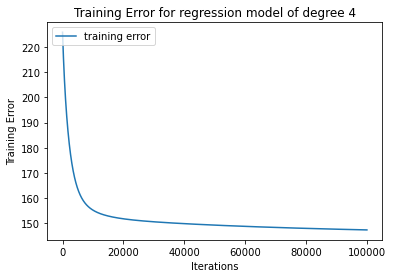

In [17]:
m=make_model(X_4,y,0.0001,100000,4)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 5
Weights: [[-0.17499476 -0.1021371   0.19355346  0.13861376  0.17406456 -0.06946678
   0.18505819  0.13019879  0.00782985 -0.12009014  0.1740437   0.10360235
   0.03400247 -0.01891339 -0.09149764  0.15223878  0.08974333  0.0501661
   0.02605305 -0.00048834 -0.05184467]]
squared_error for training dataset: 0.3387868226817027
squared_error for testing dataset: 0.3801014412840353


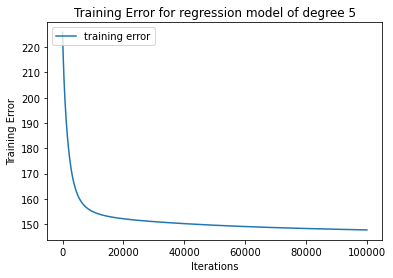

In [18]:
m=make_model(X_5,y,0.0001,100000,5)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 6
Weights: [[-0.18361419 -0.13243332  0.19670089  0.12676264  0.17408437 -0.07381308
   0.16634237  0.11433116 -0.00203586 -0.12418093  0.14631172  0.07868668
   0.01489597 -0.02888805 -0.09288769  0.11874202  0.06081986  0.02697746
   0.00953926 -0.00869665 -0.05149257  0.0978666   0.05421272  0.03754196
   0.03310511  0.02867026  0.0166123  -0.01680784]]
squared_error for training dataset: 0.3394274869044149
squared_error for testing dataset: 0.4062330015976032


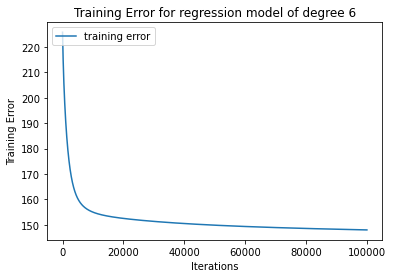

In [19]:
m=make_model(X_6,y,0.0001,100000,6)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 7
Weights: [[-0.18997016 -0.1547377   0.19693803  0.1270879   0.17840407 -0.07871924
   0.16142595  0.10585675 -0.00852798 -0.12863563  0.13225616  0.06193651
   0.00070605 -0.03661515 -0.09487177  0.09787815  0.03976802  0.00899447
  -0.00367596 -0.01543425 -0.05187789  0.07327489  0.03148825  0.01817063
   0.01747312  0.01726885  0.0106753  -0.0166441   0.0594434   0.03139387
   0.02779471  0.03276779  0.03756785  0.0382024   0.03198689  0.00985636]]
squared_error for training dataset: 0.3393355382111092
squared_error for testing dataset: 0.4230920663344977


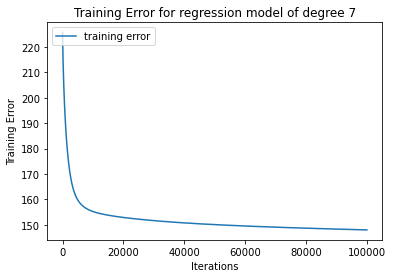

In [20]:
m=make_model(X_7,y,0.0001,100000,7)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 8
Weights: [[-0.19315416 -0.17240418  0.19553855  0.13224889  0.18461243 -0.08308415
   0.16292122  0.10172259 -0.01241184 -0.13266997  0.12561732  0.05052063
  -0.00978143 -0.04247632 -0.09714633  0.08466966  0.02418672 -0.0050484
  -0.01432992 -0.02114216 -0.05312585  0.05603246  0.01393247  0.0025667
   0.00452801  0.00752909  0.00518141 -0.01766355  0.04025235  0.0132363
   0.0117655   0.0189508   0.02597822  0.02918209  0.02647744  0.00857992
   0.0340253   0.01776479  0.02144577  0.03066112  0.03906231  0.04439775
   0.04578966  0.04231403  0.02779408]]
squared_error for training dataset: 0.33844538358580023
squared_error for testing dataset: 0.4283115566989573


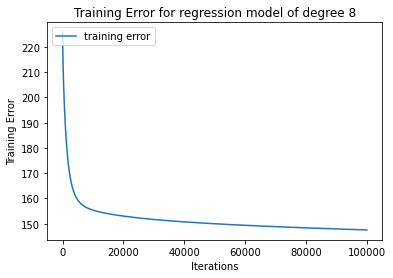

In [21]:
m=make_model(X_8,y,0.0001,100000,8)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

fitting polynomial of degree: 9
Weights: [[-0.19304345 -0.18639681  0.19294997  0.13843998  0.19113578 -0.08632243
   0.16662111  0.09996461 -0.01412873 -0.13548617  0.12265042  0.04262714
  -0.01726441 -0.04642629 -0.09895196  0.07605102  0.01256583 -0.01584874
  -0.02263785 -0.02565284 -0.05461639  0.04372326  0.00033713 -0.0098873
  -0.00602682 -0.00062166  0.00028191 -0.01940043  0.0259312  -0.00119634
  -0.00136038  0.00738363  0.01604823  0.02118466  0.02116209  0.0063299
   0.01886218  0.00318152  0.00820175  0.01874445  0.02835779  0.03492492
   0.03783725  0.03658758  0.02494339  0.01864201  0.01045257  0.01780875
   0.02852594  0.03794077  0.0447295   0.04869685  0.04982921  0.04783581
   0.03852732]]
squared_error for training dataset: 0.3370439786658801
squared_error for testing dataset: 0.4227906201663382


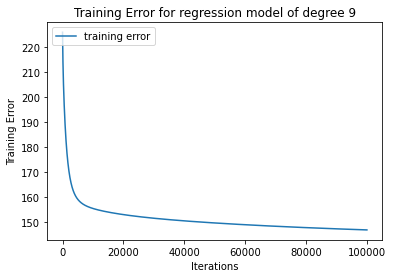

In [22]:
m=make_model(X_9,y,0.0001,100000,9)
squared_error_list.append(m[0])
squared_train_error.append(m[1])

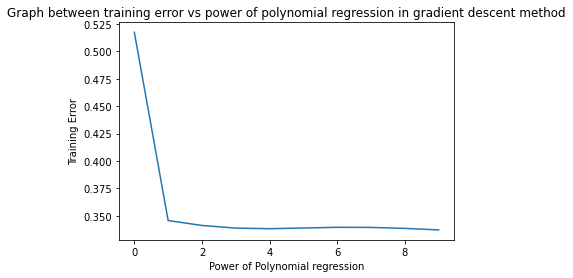

In [23]:
'''
This is the simple plot between training error and flexibility.
We know that as the flexibility increases the training error should decrease.
similarly as the flexibility increases the testing error should decrease intially and then increase.
'''
y_axis=squared_train_error
x_axis=np.array([0,1,2,3,4,5,6,7,8,9])
plt.plot(x_axis,y_axis)
plt.xlabel("Power of Polynomial regression")
plt.ylabel("Training Error")
plt.title("Graph between training error vs power of polynomial regression in gradient descent method")
plt.show()

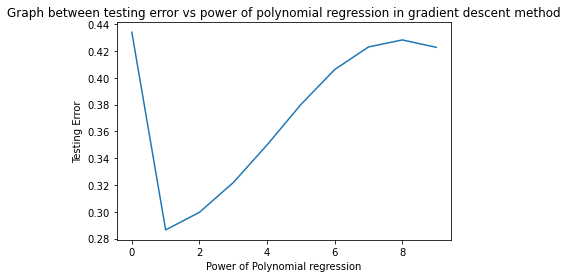

In [24]:
'''
This is the simple plot between testing error and flexibility.
We know that as the flexibility increases the training error should decrease.
similarly as the flexibility increases the testing error should decrease intially and then increase.

'''
y_axis=squared_error_list
x_axis=np.array([0,1,2,3,4,5,6,7,8,9])
plt.plot(x_axis,y_axis)
plt.xlabel("Power of Polynomial regression")
plt.ylabel("Testing Error")
plt.title("Graph between testing error vs power of polynomial regression in gradient descent method")
plt.show()

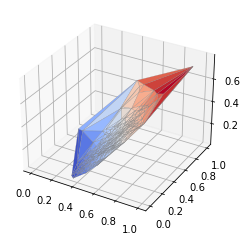

In [25]:
'''
This is the resultant surface plot between the best-fit polynomial and target variable
It is basically a plot between x1, x2, y
'''
x1=data['MLOGP']
x2=data['RDCHI']
y=-0.21236376+(0.6853533*x1)+(0.39140599*x2)
ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('coolwarm')
trisurf = ax.plot_trisurf(x1, x2, y,cmap = my_cmap,linewidth = 0.2,antialiased = True,edgecolor = 'grey')
plt.show()